## 인공지능 - 머신러닝/딥러닝닝

### Datasets: 자연어 처리 및 기계 학습 프로젝트를 위한 데이터셋

- https://huggingface.co/docs/datasets/index

자연어 처리(NLP) 및 기계 학습 프로젝트를 위한 다양하고 광범위한 데이터셋을 쉽고 빠르게 불러올 수 있도록 해주는 도구

- 자연어 처리(NLP) 관련 연구 및 응용 프로그램 개발에 널리 사용

In [2]:
# 설치
!pip install datasets

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.12.0
    Uninstalling fsspec-2024.12.0:
      Successfully uninstalled fsspec-2024.12.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9


In [3]:
from datasets import load_dataset

In [4]:
# 'emotion' 데이터셋 로드
dataset = load_dataset("emotion")

# 데이터셋의 구조 출력
print(dataset)

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

d:\01_Programming\100_HugoBank\Mine\works-need-it-python\venv\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\perso\.cache\huggingface\hub\datasets--emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
{'text': 'i didnt feel humiliated', 'label': 0}


In [5]:
# 훈련 데이터셋의 첫 번째 샘플 출력
print(dataset['train'][0])

{'text': 'i didnt feel humiliated', 'label': 0}


### `PyTorch`: 머신러닝/딥러닝 라이브러리

- https://pytorch.org/

Facebook AI Research(FAIR)에서 개발하여 공개한 딥러닝 프레임워크. 직관적인 코드 구조와 강력한 자동 미분 기능을 제공하여 연구자와 개발자 사이에서 널리 사용

In [6]:
# 설치
!pip install torch torchvision torchaudio

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [8]:
# 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# 신경망 모델 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델, 손실 함수, 옵티마이저 초기화
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 훈련 루프
for epoch in range(5):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# 훈련 완료 후 손실 출력
print('Training complete')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.92MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 147kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.39MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.13MB/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1, Loss: 0.48580384254455566
Epoch 2, Loss: 0.03821048140525818
Epoch 3, Loss: 0.10090135037899017
Epoch 4, Loss: 0.026012573391199112
Epoch 5, Loss: 0.035458389669656754
Training complete


##### torchaudio 예

In [1]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

In [18]:
!pip install soundfile

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 24.4 MB/s eta 0:00:00


##### 윈도우에서 torchaudio로 웨이브 파일 로드
- 벡엔드에서 sox 로 처리해 줘야 함
- https://sox.sourceforge.net/ 에서 Win32(밖에 없음) 다운로드 설치
- 시스템 정보 고급 경로 지정!

In [12]:
# 오디오 파일 불러오기
# torchaudio의 백엔드 설정
torchaudio.set_audio_backend('sox_io')  # or "soundfile"

waveform, sample_rate = torchaudio.load('./data/starwars60.wav') # 1분짜리 스타워즈 음악 웨이브

C:\Users\perso\AppData\Local\Temp\ipykernel_23376\3713254828.py:3: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend('sox_io')  # or "soundfile"


In [13]:
# 오디오 데이터 정보
print("샘플레이트:", sample_rate)
print("오디오 데이터 형태:", waveform.shape)

샘플레이트: 22050
오디오 데이터 형태: torch.Size([1, 1323000])


In [14]:
# 스펙트로그램 변환
transform = T.Spectrogram()
spectrogram = transform(waveform)

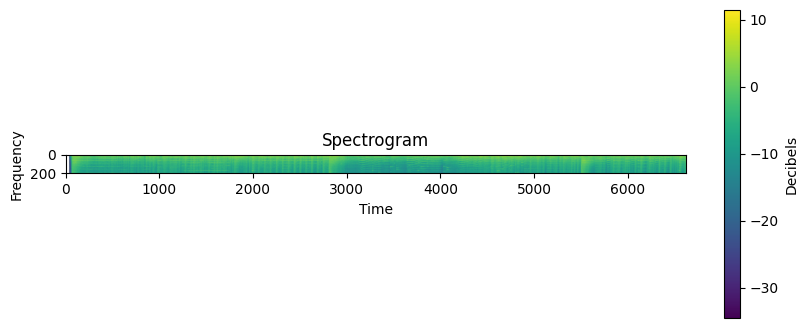

In [15]:
# 스펙트로그램 시각화
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap="viridis")
plt.colorbar(label="Decibels")
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

##### 오디오 플레이

In [8]:
!pip install sounddevice

In [16]:
import sounddevice as sd
import numpy as np

In [17]:
# Tensor를 numpy 배열로 변환
waveform_np = waveform.numpy()

In [18]:
# 오디오 데이터 재생
sd.play(waveform_np[0], sample_rate)  # 첫 번째 채널을 재생 (모노 오디오)
sd.wait()  # 오디오 재생이 끝날 때까지 기다리기

#### torchvision
- 은 생략!

#### FastAI: 딥러닝 분야 신속한 프로토타이핑과 실험

- https://github.com/fastai/fastai

딥러닝 분야에서 신속한 프로토타이핑과 실험을 지원하는 고수준의 라이브러리. PyTorch 위에 구축되었으며, 사용자 친화적인 API를 제공하여 복잡한 딥러닝 모델을 쉽고 빠르게 개발할 수 있도록 설계

In [19]:
# 설치
!pip install fastai

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   --------------------------- ------------ 8.4/12.2 MB 43.5 MB/s eta 0:00:01
   ---------------------------------------- 12.2/12.2 MB 38.3 MB/s eta 0:00:00
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
Using cached langcodes-3.5.0-py3-none-any.

##### 예제
-  FastAI가 제공하는 Pet 데이터셋을 사용하여, 이미지에서 고양이를 분류하는 모델을 학습
- FastAI의 ImageDataLoaders를 사용하여 데이터를 준비하고, 사전 훈련된 resnet34 모델을 사용하여 학습을 진행

In [ ]:
from fastai.vision.all import *

# 데이터셋 로드 및 준비
path = untar_data(URLs.PETS) / 'images'
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# 학습 모델 생성
learn = cnn_learner(dls, resnet34, metrics=error_rate)

# 모델 학습
learn.fine_tune(1)

d:\01_Programming\100_HugoBank\Mine\works-need-it-python\venv\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\perso/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 43.7MB/s]


epoch,train_loss,valid_loss,error_rate,time


### Gymnasium: 강화학습 알고리즘의 개발과 비교

- https://gymnasium.farama.org/

